In [ ]:
import pandas as pd
import os
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [ ]:
course = pd.read_csv("/kaggle/input/course-limit-with-final/filter_course_with_final.csv")
course

,Unnamed: 0,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,count_course_id,certificate,assignment,video,exam,type,start_date,end_date,season,contain_exam,total
0,0,C_674968,巴蜀文化,"['中国语言文学', '民族学']",2,[],0,巴蜀文化是中华文明绽放于西南大地的灿烂之花。本课程将从考古、历史、文学、宗教、哲学、艺术、地...,"[{'titles': ['第一章:导论 —— 巴蜀文化的悠久历程与风格特色', '1.1:...",183,1.0,90.0,10.0,0.0,1.0,"['2019-10-28', '2020-01-06', '2020-08-06', '2...","['2020-01-31', '2020-06-30', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']",0,100.0
1,1,C_674971,宝玉石鉴赏,[],0,[],0,【国家精品课】宝玉石，既是自然美的精华，也是财富身份的象征。《宝玉石鉴赏》让你了解宝石的自然...,"[{'titles': ['第一讲 序言', '1.1 宝玉石的基本概念、属性和种类', '...",23573,1.0,60.0,40.0,0.0,1.0,"['2019-11-04', '2020-02-11', '2020-08-20', '20...","['2020-01-12', '2020-07-31', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']",0,100.0
2,2,C_676642,创办新企业,['工商管理'],1,[],0,《创办新企业》课程由清华科技园和清华大学经济管理学院联合开设，是国家首批精品在线开放课程；获...,"[{'titles': ['第一章：《创办新企业》--创业者的梦想课堂--梅萌', '第一节...",19564,1.0,40.0,30.0,30.0,1.0,"['2019-10-28', '2020-02-06', '2020-08-01', '20...","['2020-01-12', '2020-07-31, '2020-12-31', '202...","['fall', 'spring', 'fall', 'spring']",1,100.0
3,3,C_676664,大国航母与舰载机,[],0,[],0,本课程将带您走进大国航母与舰载机的世界，为您揭开世界各国现役航母神秘的面纱！,"[{'titles': ['第1章 美国航母与舰载机', '1.1尼米兹级核动力航母', '...",1090,1.0,40.0,40.0,20.0,1.0,"['2019-12-01', '2020-07-14', '2021-01-04']","[' 2020-07-10, '2020-12-31', '2021-07-25']","['spring', 'fall', 'spring']",1,100.0
4,4,C_676705,民法与生活,['法学'],1,['无'],1,本课程是一门面向非法学专业学生及社会人士修读的法律类课程。民法源于生活，人的一生无时无刻不与...,"[{'titles': ['绪论', '绪论', 'Video'], 'resource_i...",274,1.0,60.0,40.0,0.0,1.0,"['2019-12-25', '2020-04-13', '2020-08-05', '20...","['2020-03-31', '2020-07-31', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']",0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,1086,C_2342499,热流体工程,[],0,"['微积分', '大学物理']",2,奋斗路上，做对选择与锻炼能力同等重要。\n也许你对掌握基础科学充满了期待，也许你还对未来的选...,"[{'titles': ['第一章 绪论', '1.1 绪论', '1.1.1 绪论视频']...",207,0.0,90.0,10.0,0.0,1.0,"['2020-12-04', '2021-03-01']","['2021-02-28', '2021-07-25']","['winter', 'spring']",0,100.0
883,1087,C_2342500,数字逻辑电路,[],0,['大学物理；电路分析；模拟电子线路'],1,万物联网，数据汪洋。数字技术的发展推动人类社会的进步，山川无语多灵秀，人类造化演智能。信息化...,[{'titles': ['Chapter1 Introductory Concepts'...,67,0.0,60.0,40.0,0.0,1.0,"['2020-12-04', '2021-04-01']","['2021-03-31', '2021-07-25']","['winter', 'spring']",0,100.0
884,1088,C_2342508,文学批评的方法与实践,[],0,['无'],1,让你在不知道作者是何人，写于何时何地，没有任何提示的状况下，依然可以深入文本，细致分析，综合...,"[{'titles': ['导论 理解文学批评', '第一节 为什么需要批评', '导论1...",90,0.0,60.0,40.0,0.0,1.0,"['2020-12-04', '2021-04-01']","['2021-03-31', '2021-07-25']","['winter', 'spring']",0,100.0
885,1089,C_2342518,客户关系管理,[],0,[],0,本课程将带您置身华为、阿里、星巴克、海底捞、迪士尼等知名企业，看企业如何建立、提升、维护客户...,"[{'titles': ['项目一：走进客户关系管理', '1-1 客户关系是否要靠“搞关系...",488,0.0,85.0,15.0,0.0,1.0,"['2020-12-04', '2021-03-01']","['2021-02-28', '2021-07-25']","['winter', 'spring']",0,100.0


In [ ]:
course.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   course_id          887 non-null    object 
 1   name               886 non-null    object 
 2   field_x            887 non-null    object 
 3   num_field_x        887 non-null    int64  
 4   prerequisites      887 non-null    object 
 5   num_prerequisites  887 non-null    int64  
 6   about              886 non-null    object 
 7   resource           887 non-null    object 
 8   count_course_id    887 non-null    int64  
 9   certificate        886 non-null    float64
 10  assignment         887 non-null    float64
 11  video              887 non-null    float64
 12  exam               887 non-null    float64
 13  type               887 non-null    float64
 14  start_date         887 non-null    object 
 15  end_date           887 non-null    object 
 16  season             887 non

In [ ]:
course.describe()

,num_field_x,num_prerequisites,count_course_id,certificate,assignment,video,exam,type,contain_exam,total
count,887.000000,887.000000,8.870000e+02,886.000000,887.000000,887.000000,887.000000,887.0,887.000000,887.000000
mean,0.101466,0.767756,1.443029e+04,0.611738,65.675310,31.597520,2.682074,1.0,0.085682,99.954904
std,0.353742,1.368031,1.182614e+05,0.487630,17.080757,14.972862,9.170959,0.0,0.280052,1.343069
min,0.000000,0.000000,1.100000e+01,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,60.000000
25%,0.000000,0.000000,1.270000e+02,0.000000,60.000000,20.000000,0.000000,1.0,0.000000,100.000000
50%,0.000000,0.000000,6.050000e+02,1.000000,70.000000,30.000000,0.000000,1.0,0.000000,100.000000
75%,0.000000,1.000000,4.534500e+03,1.000000,80.000000,40.000000,0.000000,1.0,0.000000,100.000000
max,2.000000,22.000000,3.315796e+06,1.000000,100.000000,100.000000,70.000000,1.0,1.000000,100.000000


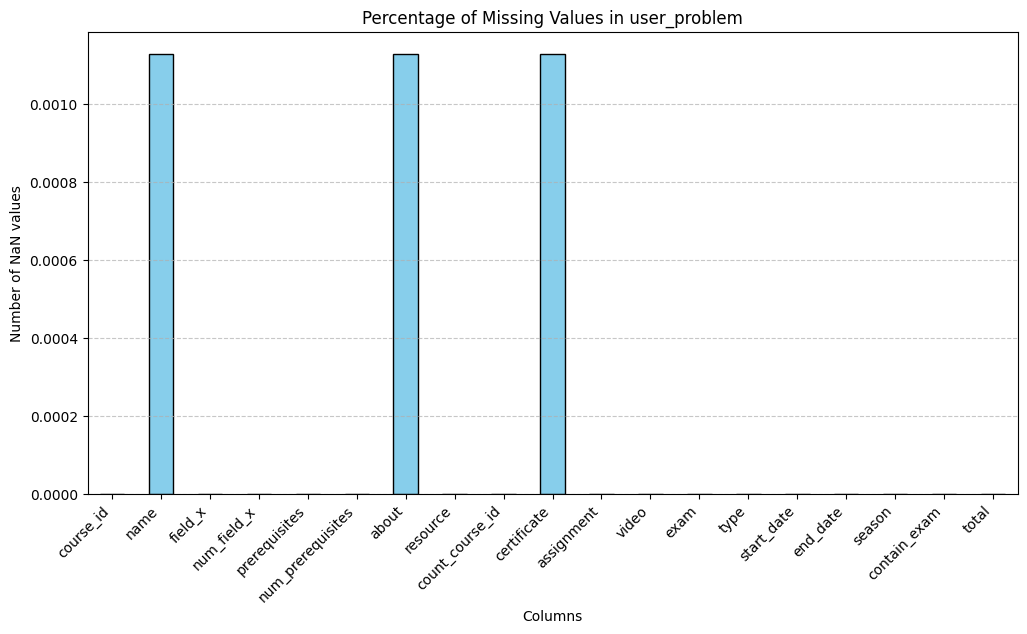

In [ ]:
# Count NaN values per column
nan_counts = course.isna().mean()

# Plot bar chart
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize plot
plt.xlabel("Columns")
plt.ylabel("Number of NaN values")
plt.title("Percentage of Missing Values in user_problem")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [ ]:
course[course['certificate'].isna()]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,count_course_id,certificate,assignment,video,exam,type,start_date,end_date,season,contain_exam,total
252,C_697126,药物化学,['药学'],1,[],0,《药物化学》是校级精品课程，也是药学专业的专业核心课程，其主要针对药学及其相关专业的本科生。...,"[{'titles': ['绪论', '药物作用的生物学基础', '药物作用的生物学基础']...",474,NaN,70.0,30.0,0.0,1.0,"['2020-02-17', '2021-03-12']","['2020-07-31', '2021-07-31']","['spring', 'spring']",0,100.0


In [ ]:
course['certificate'].fillna(1, inplace=True)

<ipython-input-8-018611691275>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  course['certificate'].fillna(1, inplace=True)


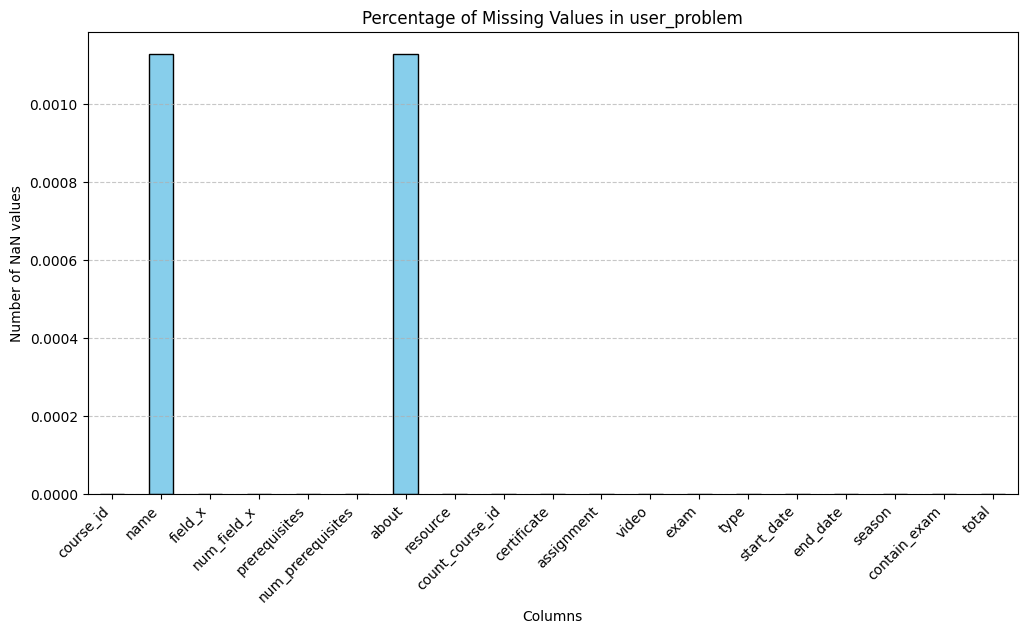

In [ ]:
# Count NaN values per column
nan_counts = course.isna().mean()

# Plot bar chart
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize plot
plt.xlabel("Columns")
plt.ylabel("Number of NaN values")
plt.title("Percentage of Missing Values in user_problem")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [ ]:
course[course['name'].isna()]

,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,count_course_id,certificate,assignment,video,exam,type,start_date,end_date,season,contain_exam,total
310,通信原理,NaN,[],0,"['高等数学', '概率论与数理统计', '信号与线性系统分析']",3,“同学，你的通信原理课上的是慕课吗？”这应是今年大学校园里学生之间见面问候的流行语。\n本课...,"[{'titles': ['第一章 绪论', '1.1 通信的基本概念', '通信的基本...",68,1.0,70.0,30.0,0.0,1.0,"['2019-12-31', '2020-02-19', '2020-09-01', '20...","['2020-02-18', '2020-06-19', '2020-12-31', '20...","['winter', 'spring', 'fall', 'spring']",0,100.0


In [ ]:
course.loc[310, 'course_id'] = "C_948399"
course.loc[310, 'name'] = "通信原理"

In [ ]:
course[course['name'].isna()]

,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,count_course_id,certificate,assignment,video,exam,type,start_date,end_date,season,contain_exam,total


In [ ]:
course[course['about'].isna()]

,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,count_course_id,certificate,assignment,video,exam,type,start_date,end_date,season,contain_exam,total
502,C_1811716,管理学原理,[],0,['无'],1,NaN,"[{'titles': ['第一章 管理导论', '1.1 管理的本质', '1.1 管理的...",326,1.0,40.0,60.0,0.0,1.0,"['2020-05-25', '2020-09-01', '2021-01-04']","['2020-08-25', '2020-12-31', '2021-07-25']","['summer', 'fall', 'spring']",0,100.0


In [ ]:
course['total'] = course['assignment'] + course['exam'] + course['video']

In [ ]:
course[course['total']!=100]

,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,count_course_id,certificate,assignment,video,exam,type,start_date,end_date,season,contain_exam,total
810,C_2297230,组织胚胎学,[],0,[],0,该课程以哺乳动物为主线，有机结合鱼类、虾蟹、贝类、棘皮动物等水产经济动物，介绍四大基本组织及...,"[{'titles': ['第一章 上皮组织', None, '被覆上皮的分类及结构功能特...",55,0.0,40.0,20.0,0.0,1.0,"['2020-10-30', '2021-03-01']","['2021-02-28', '2021-07-25']","['fall', 'spring']",0,60.0


In [ ]:
course.loc[810, 'assignment'] = 80

In [ ]:
course['total'] = course['assignment'] + course['exam'] + course['video']

In [ ]:
course[course['total']!=100]

,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,count_course_id,certificate,assignment,video,exam,type,start_date,end_date,season,contain_exam,total


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


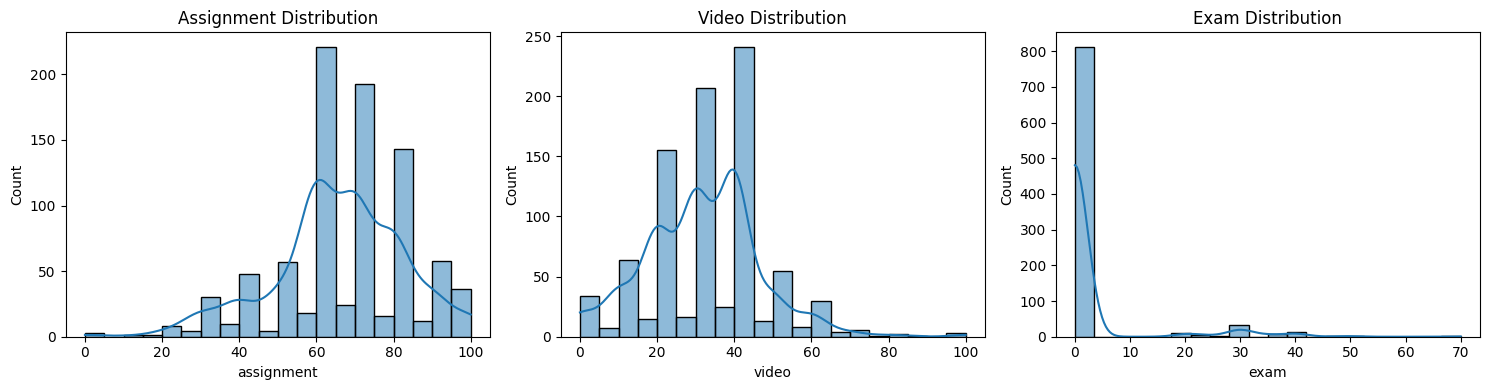

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['assignment', 'video', 'exam']

plt.figure(figsize=(15, 4))
for i, col in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(course[col], bins=20, kde=True)
    plt.title(f'{col.capitalize()} Distribution')
plt.tight_layout()
plt.show()


In [ ]:
course

,course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,resource,count_course_id,certificate,assignment,video,exam,type,start_date,end_date,season,contain_exam,total
0,C_674968,巴蜀文化,"['中国语言文学', '民族学']",2,[],0,巴蜀文化是中华文明绽放于西南大地的灿烂之花。本课程将从考古、历史、文学、宗教、哲学、艺术、地...,"[{'titles': ['第一章:导论 —— 巴蜀文化的悠久历程与风格特色', '1.1:...",183,1.0,90.0,10.0,0.0,1.0,"['2019-10-28', '2020-01-06', '2020-08-06', '2...","['2020-01-31', '2020-06-30', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']",0,100.0
1,C_674971,宝玉石鉴赏,[],0,[],0,【国家精品课】宝玉石，既是自然美的精华，也是财富身份的象征。《宝玉石鉴赏》让你了解宝石的自然...,"[{'titles': ['第一讲 序言', '1.1 宝玉石的基本概念、属性和种类', '...",23573,1.0,60.0,40.0,0.0,1.0,"['2019-11-04', '2020-02-11', '2020-08-20', '20...","['2020-01-12', '2020-07-31', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']",0,100.0
2,C_676642,创办新企业,['工商管理'],1,[],0,《创办新企业》课程由清华科技园和清华大学经济管理学院联合开设，是国家首批精品在线开放课程；获...,"[{'titles': ['第一章：《创办新企业》--创业者的梦想课堂--梅萌', '第一节...",19564,1.0,40.0,30.0,30.0,1.0,"['2019-10-28', '2020-02-06', '2020-08-01', '20...","['2020-01-12', '2020-07-31, '2020-12-31', '202...","['fall', 'spring', 'fall', 'spring']",1,100.0
3,C_676664,大国航母与舰载机,[],0,[],0,本课程将带您走进大国航母与舰载机的世界，为您揭开世界各国现役航母神秘的面纱！,"[{'titles': ['第1章 美国航母与舰载机', '1.1尼米兹级核动力航母', '...",1090,1.0,40.0,40.0,20.0,1.0,"['2019-12-01', '2020-07-14', '2021-01-04']","[' 2020-07-10, '2020-12-31', '2021-07-25']","['spring', 'fall', 'spring']",1,100.0
4,C_676705,民法与生活,['法学'],1,['无'],1,本课程是一门面向非法学专业学生及社会人士修读的法律类课程。民法源于生活，人的一生无时无刻不与...,"[{'titles': ['绪论', '绪论', 'Video'], 'resource_i...",274,1.0,60.0,40.0,0.0,1.0,"['2019-12-25', '2020-04-13', '2020-08-05', '20...","['2020-03-31', '2020-07-31', '2020-12-31', '20...","['fall', 'spring', 'fall', 'spring']",0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,C_2342499,热流体工程,[],0,"['微积分', '大学物理']",2,奋斗路上，做对选择与锻炼能力同等重要。\n也许你对掌握基础科学充满了期待，也许你还对未来的选...,"[{'titles': ['第一章 绪论', '1.1 绪论', '1.1.1 绪论视频']...",207,0.0,90.0,10.0,0.0,1.0,"['2020-12-04', '2021-03-01']","['2021-02-28', '2021-07-25']","['winter', 'spring']",0,100.0
883,C_2342500,数字逻辑电路,[],0,['大学物理；电路分析；模拟电子线路'],1,万物联网，数据汪洋。数字技术的发展推动人类社会的进步，山川无语多灵秀，人类造化演智能。信息化...,[{'titles': ['Chapter1 Introductory Concepts'...,67,0.0,60.0,40.0,0.0,1.0,"['2020-12-04', '2021-04-01']","['2021-03-31', '2021-07-25']","['winter', 'spring']",0,100.0
884,C_2342508,文学批评的方法与实践,[],0,['无'],1,让你在不知道作者是何人，写于何时何地，没有任何提示的状况下，依然可以深入文本，细致分析，综合...,"[{'titles': ['导论 理解文学批评', '第一节 为什么需要批评', '导论1...",90,0.0,60.0,40.0,0.0,1.0,"['2020-12-04', '2021-04-01']","['2021-03-31', '2021-07-25']","['winter', 'spring']",0,100.0
885,C_2342518,客户关系管理,[],0,[],0,本课程将带您置身华为、阿里、星巴克、海底捞、迪士尼等知名企业，看企业如何建立、提升、维护客户...,"[{'titles': ['项目一：走进客户关系管理', '1-1 客户关系是否要靠“搞关系...",488,0.0,85.0,15.0,0.0,1.0,"['2020-12-04', '2021-03-01']","['2021-02-28', '2021-07-25']","['winter', 'spring']",0,100.0


In [ ]:
course.drop(columns=['name', 'field_x',	'num_field_x', 'prerequisites',	'num_prerequisites', 'about', 'resource', 'count_course_id', 'total', 'season'], inplace=True)
course

,course_id,certificate,assignment,video,exam,type,start_date,end_date,contain_exam
0,C_674968,1.0,90.0,10.0,0.0,1.0,"['2019-10-28', '2020-01-06', '2020-08-06', '2...","['2020-01-31', '2020-06-30', '2020-12-31', '20...",0
1,C_674971,1.0,60.0,40.0,0.0,1.0,"['2019-11-04', '2020-02-11', '2020-08-20', '20...","['2020-01-12', '2020-07-31', '2020-12-31', '20...",0
2,C_676642,1.0,40.0,30.0,30.0,1.0,"['2019-10-28', '2020-02-06', '2020-08-01', '20...","['2020-01-12', '2020-07-31, '2020-12-31', '202...",1
3,C_676664,1.0,40.0,40.0,20.0,1.0,"['2019-12-01', '2020-07-14', '2021-01-04']","[' 2020-07-10, '2020-12-31', '2021-07-25']",1
4,C_676705,1.0,60.0,40.0,0.0,1.0,"['2019-12-25', '2020-04-13', '2020-08-05', '20...","['2020-03-31', '2020-07-31', '2020-12-31', '20...",0
...,...,...,...,...,...,...,...,...,...
882,C_2342499,0.0,90.0,10.0,0.0,1.0,"['2020-12-04', '2021-03-01']","['2021-02-28', '2021-07-25']",0
883,C_2342500,0.0,60.0,40.0,0.0,1.0,"['2020-12-04', '2021-04-01']","['2021-03-31', '2021-07-25']",0
884,C_2342508,0.0,60.0,40.0,0.0,1.0,"['2020-12-04', '2021-04-01']","['2021-03-31', '2021-07-25']",0
885,C_2342518,0.0,85.0,15.0,0.0,1.0,"['2020-12-04', '2021-03-01']","['2021-02-28', '2021-07-25']",0


In [ ]:
# Convert the string representation of lists to actual lists
course['start_date'] = course['start_date'].apply(lambda x: x.strip("[]").split(", "))
course['end_date'] = course['end_date'].apply(lambda x: x.strip("[]").split(", "))

# Function to clean date list (remove any extra whitespace and quotes)
def clean_dates(date_list):
    return [date.strip().strip("'") for date in date_list]

# Apply the clean_dates function to both columns
course['start_date'] = course['start_date'].apply(clean_dates)
course['end_date'] = course['end_date'].apply(clean_dates)

# Output the cleaned DataFrame
course_filtered = course[['course_id', 'certificate', 'assignment', 'video', 'exam', 'type', 'start_date', 'end_date', 'contain_exam']]
course_filtered

,course_id,certificate,assignment,video,exam,type,start_date,end_date,contain_exam
0,C_674968,1.0,90.0,10.0,0.0,1.0,"[2019-10-28, 2020-01-06, 2020-08-06, 2021-01-04]","[2020-01-31, 2020-06-30, 2020-12-31, 2021-07-25]",0
1,C_674971,1.0,60.0,40.0,0.0,1.0,"[2019-11-04, 2020-02-11, 2020-08-20, 2021-01-04]","[2020-01-12, 2020-07-31, 2020-12-31, 2021-07-25]",0
2,C_676642,1.0,40.0,30.0,30.0,1.0,"[2019-10-28, 2020-02-06, 2020-08-01, 2021-01-01]","[2020-01-12, 2020-07-31, 2020-12-31, 2021-07-25]",1
3,C_676664,1.0,40.0,40.0,20.0,1.0,"[2019-12-01, 2020-07-14, 2021-01-04]","[ 2020-07-10, 2020-12-31, 2021-07-25]",1
4,C_676705,1.0,60.0,40.0,0.0,1.0,"[2019-12-25, 2020-04-13, 2020-08-05, 2021-01-04]","[2020-03-31, 2020-07-31, 2020-12-31, 2021-07-25]",0
...,...,...,...,...,...,...,...,...,...
882,C_2342499,0.0,90.0,10.0,0.0,1.0,"[2020-12-04, 2021-03-01]","[2021-02-28, 2021-07-25]",0
883,C_2342500,0.0,60.0,40.0,0.0,1.0,"[2020-12-04, 2021-04-01]","[2021-03-31, 2021-07-25]",0
884,C_2342508,0.0,60.0,40.0,0.0,1.0,"[2020-12-04, 2021-04-01]","[2021-03-31, 2021-07-25]",0
885,C_2342518,0.0,85.0,15.0,0.0,1.0,"[2020-12-04, 2021-03-01]","[2021-02-28, 2021-07-25]",0


In [ ]:
# Initialize a list to hold the final rows
final_rows = []

# Iterate through each row in the DataFrame
for _, row in course.iterrows():
    # Extract start and end dates as lists
    start_dates = row['start_date']
    end_dates = row['end_date']

    # Ensure both lists are of equal length
    if len(start_dates) == len(end_dates):
        for start, end in zip(start_dates, end_dates):
            final_row = row.drop(['start_date', 'end_date']).to_dict()
            final_row['start_date'] = start
            final_row['end_date'] = end
            final_rows.append(final_row)

# Convert the list of rows back to a DataFrame
final_df = pd.DataFrame(final_rows)

# Display the final DataFrame
final_df

,course_id,certificate,assignment,video,exam,type,contain_exam,start_date,end_date
0,C_674968,1.0,90.0,10.0,0.0,1.0,0,2019-10-28,2020-01-31
1,C_674968,1.0,90.0,10.0,0.0,1.0,0,2020-01-06,2020-06-30
2,C_674968,1.0,90.0,10.0,0.0,1.0,0,2020-08-06,2020-12-31
3,C_674968,1.0,90.0,10.0,0.0,1.0,0,2021-01-04,2021-07-25
4,C_674971,1.0,60.0,40.0,0.0,1.0,0,2019-11-04,2020-01-12
...,...,...,...,...,...,...,...,...,...
2429,C_2342508,0.0,60.0,40.0,0.0,1.0,0,2021-04-01,2021-07-25
2430,C_2342518,0.0,85.0,15.0,0.0,1.0,0,2020-12-04,2021-02-28
2431,C_2342518,0.0,85.0,15.0,0.0,1.0,0,2021-03-01,2021-07-25
2432,C_2343056,0.0,60.0,40.0,0.0,1.0,0,2020-12-04,2021-02-28


In [ ]:
from datetime import datetime

def days_between_dates(start, end):
    # Check if either value is missing or empty
    if not start or not end or str(start).strip() == '' or str(end).strip() == '':
        return None  # or return 0 or np.nan depending on how you want to handle it

    try:
        start_dt = datetime.strptime(start.strip(), "%Y-%m-%d")
        end_dt = datetime.strptime(end.strip(), "%Y-%m-%d")
        return (end_dt - start_dt).days
    except ValueError:
        return None  # Catch any format issues gracefully

# Then apply it to the DataFrame
final_df['duration_days'] = final_df.apply(lambda row: days_between_dates(row['start_date'], row['end_date']), axis=1)

In [ ]:
final_df

,course_id,certificate,assignment,video,exam,type,contain_exam,start_date,end_date,duration_days
0,C_674968,1.0,90.0,10.0,0.0,1.0,0,2019-10-28,2020-01-31,95.0
1,C_674968,1.0,90.0,10.0,0.0,1.0,0,2020-01-06,2020-06-30,176.0
2,C_674968,1.0,90.0,10.0,0.0,1.0,0,2020-08-06,2020-12-31,147.0
3,C_674968,1.0,90.0,10.0,0.0,1.0,0,2021-01-04,2021-07-25,202.0
4,C_674971,1.0,60.0,40.0,0.0,1.0,0,2019-11-04,2020-01-12,69.0
...,...,...,...,...,...,...,...,...,...,...
2429,C_2342508,0.0,60.0,40.0,0.0,1.0,0,2021-04-01,2021-07-25,115.0
2430,C_2342518,0.0,85.0,15.0,0.0,1.0,0,2020-12-04,2021-02-28,86.0
2431,C_2342518,0.0,85.0,15.0,0.0,1.0,0,2021-03-01,2021-07-25,146.0
2432,C_2343056,0.0,60.0,40.0,0.0,1.0,0,2020-12-04,2021-02-28,86.0


/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


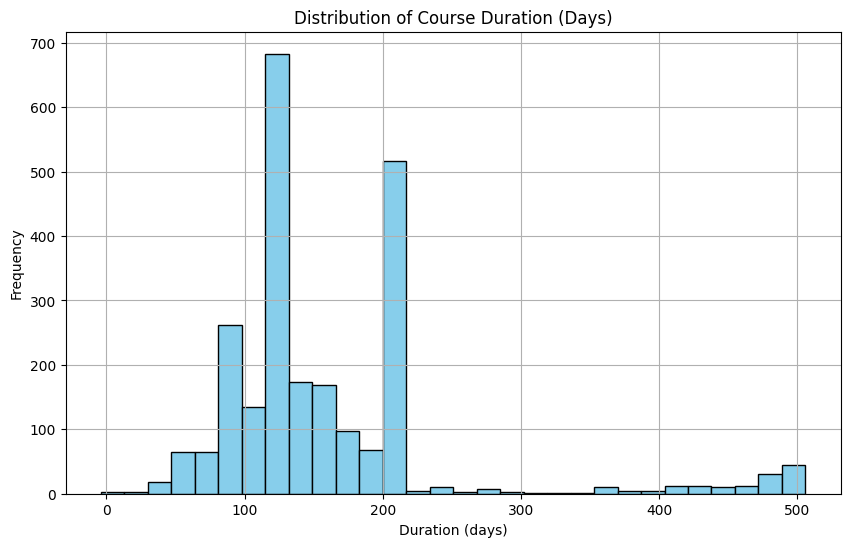

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(final_df['duration_days'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Course Duration (Days)')
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
final_df[final_df['duration_days'] >=400]

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)


,course_id,certificate,assignment,video,exam,type,contain_exam,start_date,end_date,duration_days
1393,C_1755915,0.0,60.0,40.0,0.0,1.0,0,2020-04-12,2021-08-31,506.0
1394,C_1755921,0.0,60.0,40.0,0.0,1.0,0,2020-04-12,2021-08-31,506.0
1398,C_1755929,0.0,60.0,10.0,30.0,1.0,1,2020-04-12,2021-08-31,506.0
1401,C_1755939,0.0,100.0,0.0,0.0,1.0,0,2020-04-12,2021-08-31,506.0
1402,C_1755941,0.0,75.0,25.0,0.0,1.0,0,2020-04-12,2021-08-31,506.0
...,...,...,...,...,...,...,...,...,...,...
1759,C_1909583,0.0,100.0,0.0,0.0,1.0,0,2020-07-22,2021-08-31,405.0
1760,C_1909589,0.0,100.0,0.0,0.0,1.0,0,2020-07-22,2021-08-31,405.0
1922,C_1792323,1.0,30.0,40.0,30.0,1.0,1,2020-05-12,2021-07-31,445.0
1937,C_1912002,1.0,100.0,0.0,0.0,1.0,0,2019-09-27,2021-01-17,478.0


In [ ]:
final_df[final_df['duration_days'] <=56]

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


,course_id,certificate,assignment,video,exam,type,contain_exam,start_date,end_date,duration_days
19,C_676969,1.0,80.0,20.0,0.0,1.0,0,2019-11-18,2020-01-12,55.0
23,C_677004,1.0,80.0,20.0,0.0,1.0,0,2019-12-25,2020-01-12,18.0
27,C_677010,1.0,80.0,20.0,0.0,1.0,0,2019-11-18,2020-01-12,55.0
37,C_677061,1.0,80.0,20.0,0.0,1.0,0,2021-01-04,2020-12-31,-4.0
128,C_681031,1.0,60.0,40.0,0.0,1.0,0,2020-01-16,2020-02-14,29.0
130,C_681031,1.0,60.0,40.0,0.0,1.0,0,2020-08-10,2020-09-15,36.0
197,C_681611,1.0,60.0,40.0,0.0,1.0,0,2020-02-10,2020-04-01,51.0
218,C_681710,1.0,80.0,20.0,0.0,1.0,0,2020-09-29,2020-11-03,35.0
219,C_681710,1.0,80.0,20.0,0.0,1.0,0,2021-03-22,2021-05-02,41.0
336,C_682671,1.0,35.0,30.0,35.0,1.0,1,2019-11-18,2020-01-12,55.0


In [ ]:
final_df.loc[37, 'end_date'] = '2021-07-25'

In [ ]:
final_df.loc[422, 'end_date'] = '2021-06-20'

In [ ]:
final_df.loc[23, 'end_date'] = '2020-03-31'

In [ ]:
def days_between_dates(start, end):
    # Check if either value is missing or empty
    if not start or not end or str(start).strip() == '' or str(end).strip() == '':
        return None  # or return 0 or np.nan depending on how you want to handle it

    try:
        start_dt = datetime.strptime(start.strip(), "%Y-%m-%d")
        end_dt = datetime.strptime(end.strip(), "%Y-%m-%d")
        return (end_dt - start_dt).days
    except ValueError:
        return None  # Catch any format issues gracefully

# Then apply it to the DataFrame
final_df['duration_days'] = final_df.apply(lambda row: days_between_dates(row['start_date'], row['end_date']), axis=1)

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


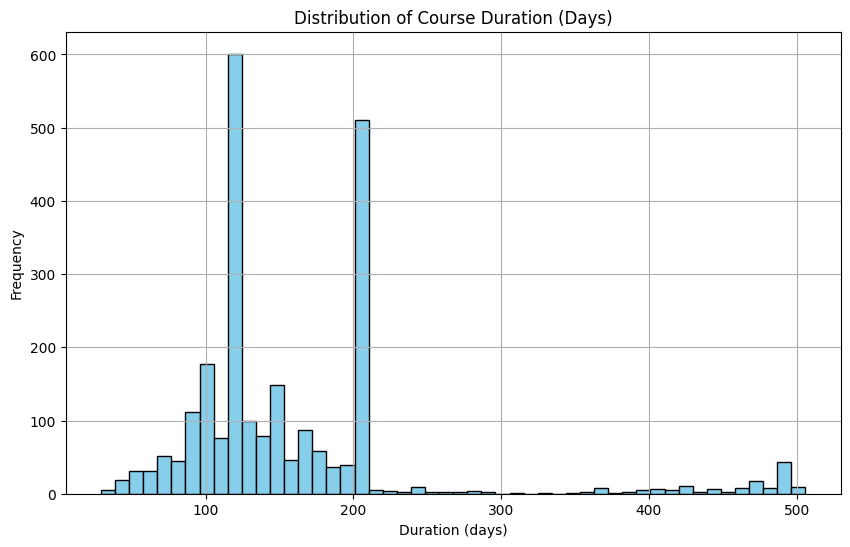

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(final_df['duration_days'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Course Duration (Days)')
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
final_df.to_csv('course_info_final.csv', index=False)